weights shape: (7, 7, 1, 64)
-0.08827526 0.10158301


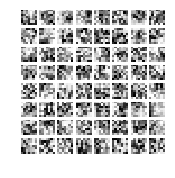

In [19]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

model = "depth"

filenames = {
    "coco": 'logs/hinterstoisser_rgb_coco20180514T1037/mask_rcnn_hinterstoisser_rgb_coco_0100.h5',
    "rgb_nat" : 'logs/hinterstoisser_rgb_20180511T0924/mask_rcnn_hinterstoisser_rgb_only_0100.h5',
    "rgb_simple" : 'logs/sixd20180406T1527/mask_rcnn_sixd_0100.h5',
    "rgb_advanced" : 'logs/overlay3d20180420T0727/mask_rcnn_overlay3d_0058.h5',
    "depth" : 'logs/hinterstoisser_depth_only_20180507T1114/mask_rcnn_hinterstoisser_0100.h5',
}

filename = filenames[model]
f = h5py.File(filename, 'r')

# rgb shape: (7, 7, 3, 64)
weights = f['conv1']['conv1']['kernel:0'].value
print("weights shape:", weights.shape)

mi, ma = weights.min(), weights.max()
weights = (weights - mi) / (ma - mi)

H, W = 8, 8

plt.figure(figsize=(2, 2))
for i in range(H):
    for j in range(W):
        plt.subplot(H, W, i * W + j + 1)
        if weights.shape[2] == 3:
            plt.imshow(weights[:, :, :, i * W + j])
        else:
            plt.imshow(weights[:, :, 0, i * W + j], cmap='Greys')
        plt.axis('off')

print(mi, ma)
plt.subplots_adjust(0, 0, 1, 1)
plt.savefig("weight_visualisations/{}.png".format(model), dpi=300)